## Load librarys

In [1]:
import numpy as np
import pandas as pd
import os
import sys
import matplotlib.pyplot as plt
import csv
import random
import tensorflow as tf
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from numpy.random import seed
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, roc_curve, auc
from collections import Counter

parentDir = os.path.dirname(os.path.abspath(os.getcwd()))
sys.path.append(os.path.join(parentDir, "general_utils"))
import file_management
from data_preprocessing import data_preprocessing

seed(0)

2023-03-14 17:03:05.315592: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
train_test_path = os.path.join('Classification datasets', 'Train and test sets')
X_train, X_test, y_train, y_test, std_scale, cluster_id_train, cluster_id_test = data_preprocessing(train_test_path, use_spectral_bands=True, use_indices=True)

     cluster_id           C           B           G           Y           R  \
314        1398   99.720984   82.710320   70.930293   78.311811   54.853197   
178        1149  139.402345  113.234367   99.685817  133.694488   79.205065   
437        1653  134.916626  114.219013  101.815856  114.645669   82.894742   
327        1429  118.353971   99.121098   87.757600   94.009449   71.579732   
558        1895  104.551759   86.320691   72.847328   76.371654   57.558960   
..          ...         ...         ...         ...         ...         ...   
275        1330   93.164933   76.474224   64.114169   47.798425   34.682963   
427        1627  101.791316   87.305338   72.421320   76.724409   58.296895   
331        1434  121.804524   99.121098   83.071515   95.067717   63.462443   
593        2026  144.233119  119.470462  103.732891  113.234646   84.862569   
144        1071  151.479280  134.568378  131.849404  144.982677  102.573018   

             RE           N         N2    NDVI_1  .

In [4]:
X_train

array([[ 1.99409447,  1.91919073,  1.43853778, ..., -0.96036431,
        -1.33780135,  0.38178907],
       [ 2.67398756,  2.63385914,  2.03426804, ..., -0.90583642,
        -1.26425913,  0.52263915],
       [-0.54172301, -0.30207597, -0.23695359, ..., -1.24322284,
        -1.43437222,  0.59871539],
       ...,
       [-0.79897986, -0.16686843,  0.07332259, ..., -0.6214711 ,
        -0.28816756,  2.09445771],
       [-0.68872692, -0.10892234,  0.12296678, ..., -0.46227922,
        -0.09202701,  1.8443753 ],
       [-0.5600985 , -0.01234553,  0.24707725, ..., -0.45991858,
        -0.03415089,  1.85664153]])

In [7]:
from sklearn.model_selection import StratifiedKFold
K = 5
kfold = StratifiedKFold(n_splits=K, shuffle=True, random_state=0) #fix the divisions of the data

In [36]:
trees_set = set(cluster_id_test)
trees_label = {tree: label for tree, label in zip(cluster_id_test, y_test)}

In [25]:
# Get lists of trees and labels
trees = list(trees_set)
labels = [trees_label[tree] for tree in trees]

In [26]:
K = 5
kfold = StratifiedKFold(n_splits=K, shuffle=True, random_state=0) #fix the divisions of the data

In [27]:
for train, validate in kfold.split(trees, labels):
    print(train, validate)
    
    break

[ 0  1  2  3  5  6  7  9 10 11 12 13 14 15 16 17 19 20 21 22 23 24 25 26
 27 28 29 31 33 34 36 37 38 39 41 42 44 45 46 47 48 49 50 52 54 55 56 58
 59 62] [ 4  8 18 30 32 35 40 43 51 53 57 60 61]


In [35]:
train_mask = np.isin(cluster_id_test, np.array(trees)[train])

(2594,)

In [6]:
X_test

array([[-1.06095947, -1.52389024, -1.55644798, ...,  2.13646192,
         1.6776804 , -1.65720489],
       [ 0.52034057,  0.09743728, -0.02021897, ...,  0.17571513,
         0.15807483, -0.07834646],
       [-0.27030945, -0.55881433, -0.6272772 , ..., -0.25173985,
        -0.43248375, -0.2752477 ],
       ...,
       [ 0.35485568,  0.15534184,  0.09128153, ..., -0.2648523 ,
        -0.25460927, -0.23597692],
       [ 1.55002432,  1.23622685,  1.56556582, ..., -0.95765505,
        -0.45231523,  0.58883662],
       [ 0.66743825,  0.71508586,  0.3390604 , ..., -0.76252772,
        -1.21279918,  0.23349832]])

In [68]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate random dataset with 1000 rows and 2 features
feature1 = np.random.randint(low=0, high=2, size=10000)
feature2 = np.random.randint(low=0, high=500, size=10000)

# Generate random binary target variable
# all rows with same feature2 value will have the same target value
target = np.where(feature2 > 250, 1, 0)

# Combine features and target into a pandas DataFrame
df = pd.DataFrame({'feature1': feature1, 'feature2': feature2, 'target': target})

# Print the first few rows of the dataset
print(df.head())

   feature1  feature2  target
0         0        50       0
1         1       487       1
2         0        70       0
3         0       479       1
4         0        47       0


In [69]:
# groupby feature_2 and train test split on each group
def groupby_split(df, feature_1, feature_2, test_size):
    # Given df and feature_2, groupby feature_2 and split each group into train and test sets
    # feature_1 is the feature to stratify the split
    # test_size is the size of the test set
    # Return a list of tuples (train, test) where train and test are dataframes
    
    # Create new dataframe with the first row for each unique value of feature_2
    df_new = df.groupby(feature_2).first().reset_index()
    # Stratify the split on feature_1
    train, test = train_test_split(df_new, test_size=test_size, stratify=df_new[feature_1])
    # From the original dataframe, select the rows that have the same values of feature_2 as the train and test dataframes
    train_df = df[df[feature_2].isin(train[feature_2])]
    test_df = df[df[feature_2].isin(test[feature_2])]
    # Return a list of tuples (train, test) where train and test are dataframes
    return train_df, test_df


In [70]:
train_df, test_df = groupby_split(df, 'target', 'feature2', 0.2)

In [74]:
from collections import Counter

feature = 'feature1'

# Print the number of samples in each set
print('Training set size: ', len(train_df))
print('Test set size: ', len(test_df))

# Ensure that the proportion of samples in each set is the same as the original dataset
# Print the proportion samples in each set by dividing the counter by the total number of samples
print('Original dataset proportions: ', get_class_proportions(df, feature))
print('Training set proportions: ', get_class_proportions(train_df, feature) )
print('Test set proportions: ', get_class_proportions(test_df, feature) )

Training set size:  8015
Test set size:  1985
Original dataset proportions:  {0: 0.5013, 1: 0.4987}
Training set proportions:  {0: 0.5010605115408608, 1: 0.4989394884591391}
Test set proportions:  {0: 0.5022670025188917, 1: 0.49773299748110833}


In [72]:
test_df

,feature1,feature2,target
2,0,70,0
6,0,261,1
7,0,83,0
10,0,106,0
12,0,303,1
...,...,...,...
9964,0,96,0
9973,1,209,0
9977,1,327,1
9982,1,181,0


In [44]:
# Define a function that, given a counter, returns the proportion of each class
def get_class_proportions(df, feature):
    counter = Counter(df[feature])
    total = sum(counter.values())
    new_dict = {cl: count / total for cl, count in counter.items()}
    # Sort the dictionary by key
    new_dict = {k: new_dict[k] for k in sorted(new_dict)}
    return new_dict

In [38]:
from sklearn.model_selection import train_test_split

# Specify the features you want to use for stratification
stratify_cols = ['feature1', 'target']

# Split the dataset into a training set and a test set, stratifying based on the specified features
train_df, test_df = train_test_split(df, test_size=0.2, stratify=df[stratify_cols], random_state=42)

from collections import Counter

feature = 'feature2'

# Print the number of samples in each set
print('Training set size: ', len(train_df))
print('Test set size: ', len(test_df))

# Ensure that the proportion of samples in each set is the same as the original dataset
# Print the proportion samples in each set by dividing the counter by the total number of samples
print('Original dataset proportions: ', get_class_proportions(df, feature))
print('Training set proportions: ', get_class_proportions(train_df, feature) )
print('Test set proportions: ', get_class_proportions(test_df, feature) )

Training set size:  80
Test set size:  20
Original dataset proportions:  {0: 0.56, 1: 0.44}
Training set proportions:  {0: 0.5375, 1: 0.4625}
Test set proportions:  {0: 0.65, 1: 0.35}


In [2]:
## Create dir to save figures
classification_path = 'Classification figures'
os.makedirs(classification_path, exist_ok=True)

## Load data

In [3]:
df = file_management.load_lzma('Processed Data/QPCR_labelled_df.lzma')
df = df.dropna()
df

,C,B,G,Y,R,RE,N,N2,NDVI_1,NDVI_2,...,NPQI_4,NPQI_5,CLR,CLG,BNDVI,CTR1,cluster_id,Lats,Longs,PCR
66182,89.024270,82.382104,72.421320,72.491339,60.264723,70.815202,76.478698,46.799628,0.118572,-0.125766,...,0.067519,0.077052,0.079976,0.056025,-0.037161,0.676947,285,39.618106,2.583509,1.0
66183,119.044081,106.998271,92.017678,94.714961,74.777452,95.569189,103.451830,65.193512,0.160885,-0.068471,...,0.092949,0.106111,0.082481,0.124260,-0.016852,0.628149,285,39.618106,2.583515,1.0
66184,143.888064,126.691204,106.714946,112.529134,85.846483,116.719747,126.477675,82.306809,0.191364,-0.021050,...,0.110915,0.126643,0.083601,0.185192,-0.000843,0.596620,285,39.618106,2.583520,1.0
66185,156.655110,138.835180,116.939132,124.875591,95.931600,128.783398,139.964241,92.551503,0.186661,-0.017933,...,0.105269,0.120206,0.086819,0.196898,0.004050,0.612375,285,39.618106,2.583526,1.0
66186,160.450719,148.025216,129.719365,135.987402,112.166178,134.893560,146.378584,96.044013,0.132327,-0.077432,...,0.070320,0.080300,0.085141,0.128425,-0.005593,0.699069,285,39.618106,2.583532,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
778154,99.375929,95.838942,82.858511,66.847244,71.825711,79.745438,98.517721,67.638269,0.156695,-0.030025,...,0.031586,0.036052,0.235403,0.188987,0.013783,0.722768,2685,39.614768,2.585019,0.0
778155,98.340763,97.480020,85.414557,71.962205,77.483215,78.022059,94.899374,63.680091,0.101032,-0.097781,...,0.007663,0.008746,0.216315,0.111044,-0.013414,0.787905,2685,39.614768,2.585025,0.0
778156,92.474823,92.885002,82.219499,71.785827,76.745280,73.008593,87.827150,57.742825,0.067337,-0.141295,...,-0.003857,-0.004402,0.202970,0.068203,-0.027988,0.829905,2685,39.614768,2.585031,0.0
779120,95.580320,91.900356,79.237445,61.379528,69.857883,75.358655,88.649502,64.727844,0.118554,-0.038117,...,0.034213,0.039049,0.176368,0.118783,-0.018005,0.730881,2685,39.614764,2.585013,0.0


## Save real data for testing

In [4]:
df = df.sample(frac=1, random_state=42)
n_test = int(len(df)*0.05) # 5% of tree pixels for testing
n_train = len(df) - n_test
test_df = df.iloc[:n_test]
train_df = df.iloc[n_test:]

## Data preprocessing

In [5]:
#Data preprocessing: Normalization of spectral bands
# spectral_bands = ['C', 'B', 'G', 'Y', 'R', 'RE', 'N', 'N2']
# X_train = train_df.loc[:, spectral_bands] # only spectral bands
X_train = train_df.iloc[:, :-4] # spectral bands + indices
#X_train = train_df.iloc[:, 8:-4] # indices
X_test = test_df.iloc[:, :-4] 
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Y_train = train_df['PCR'].values
Y_test = test_df['PCR'].values

In [6]:
n_features = X_train.shape[1]

print(Counter(Y_train))

Counter({0.0: 28731, 1.0: 9585})


## SVC with penalization for the minority class

## Balance the dataset using oversampling techniques

In [8]:
#random.seed(42)
#
#c = list(zip(X_train, Y_train))
#random.shuffle(c)
#X_train, Y_train = zip(*c)
#X_train = np.array(X_train)
#Y_train = np.array(Y_train)

file_management.save_lzma(X_train, 'X_train.lzma', '')
file_management.save_lzma(Y_train, 'Y_train.lzma', '')
file_management.save_lzma(X_test, 'X_test.lzma', '')
file_management.save_lzma(Y_test, 'Y_test.lzma', '')

## UMAP

In [11]:
from umap import UMAP

/home/jgalvan/.conda/envs/xylella_tf/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [12]:
X1 = X[5000:, :]
Y1 = Y[5000:]

X1.shape

(15833, 27)

In [18]:
# Visualization
import plotly.express as px # for data visualization
import matplotlib.pyplot as plt # for showing handwritten digits

def chart(X, y):
    #--------------------------------------------------------------------------#
    # This section is not mandatory as its purpose is to sort the data by label 
    # so, we can maintain consistent colors for digits across multiple graphs
    
    # Concatenate X and y arrays
    arr_concat=np.concatenate((X, y.reshape(y.shape[0],1)), axis=1)
    # Create a Pandas dataframe using the above array
    df=pd.DataFrame(arr_concat, columns=['x', 'y', 'z', 'label'])
    # Convert label data type from float to integer
    df['label'] = df['label'].astype(int)
    # Finally, sort the dataframe by label
    df.sort_values(by='label', axis=0, ascending=True, inplace=True)
    #--------------------------------------------------------------------------#
    
    # Create a 3D graph
    fig = px.scatter_3d(df, x='x', y='y', z='z', color=df['label'].astype(str), height=900, width=950)

    # Update chart looks
    fig.update_layout(title_text='UMAP',
                      showlegend=True,
                      legend=dict(orientation="h", yanchor="top", y=0, xanchor="center", x=0.5),
                      scene_camera=dict(up=dict(x=0, y=0, z=1), 
                                            center=dict(x=0, y=0, z=-0.1),
                                            eye=dict(x=1.5, y=-1.4, z=0.5)),
                                            margin=dict(l=0, r=0, b=0, t=0),
                      scene = dict(xaxis=dict(backgroundcolor='white',
                                              color='black',
                                              gridcolor='#f0f0f0',
                                              title_font=dict(size=10),
                                              tickfont=dict(size=10),
                                             ),
                                   yaxis=dict(backgroundcolor='white',
                                              color='black',
                                              gridcolor='#f0f0f0',
                                              title_font=dict(size=10),
                                              tickfont=dict(size=10),
                                              ),
                                   zaxis=dict(backgroundcolor='lightgrey',
                                              color='black', 
                                              gridcolor='#f0f0f0',
                                              title_font=dict(size=10),
                                              tickfont=dict(size=10),
                                             )))
    # Update marker size
    fig.update_traces(marker=dict(size=3, line=dict(color='black', width=0.1)))
    fig.show()

## Explore the differences between the two classes

## Train a simple neural network usign 7-fold validation

In [7]:
## Since there exist an unbalance in the dataset we perform some 
# over_sampling techniques (SMOTE)
from imblearn.over_sampling import ADASYN, RandomOverSampler

#ros = RandomOverSampler(random_state=42, ratio=1.0)
#X_train, Y_train = ros.fit_resample(X_train, Y_train)

adasyn = ADASYN(random_state=42)
# X_train, Y_train = adasyn.fit_resample(X_train, Y_train)

In [8]:
# =============================================================================
# ANN: 1 pixel = 1 tree
# =============================================================================

# Define the K-fold Cross Validator
num_folds = 7
#n_features = 27
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=0) #fix the divition

# Define per-fold score containers
acc_per_fold = []
loss_per_fold = []

#Set the training parameters
num_epochs = 15000
verbosity = 1 #0:silent, 1:to show a progress bar during the training, 2:show results after each epoch

#initializer = tf.keras.initializers.RandomNormal(mean=0., stddev=1.)
initializer = tf.keras.initializers.GlorotNormal(seed=42)

# Define the model architecture
def model():
    classifier = Sequential()
    # First layer
    classifier.add(Dense(units = 128, input_dim = n_features, kernel_initializer = initializer,  activation = "relu"))
    # Second layer
    classifier.add(Dense(units = 64, kernel_initializer = initializer,  activation = "relu"))
    #classifier.add(Dropout(rate = 0.2))
    # Third layer
    classifier.add(Dense(units = 32, kernel_initializer = initializer,  activation = "relu"))
    #classifier.add(Dropout(rate = 0.2))
    
    classifier.add(Dense(units = 8, kernel_initializer = initializer,  activation = "relu"))

    # Output layer
    classifier.add(Dense(units = 1, kernel_initializer = initializer,  activation = "sigmoid"))

    # Compilar la RNA
    classifier.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])
    return classifier

# def model():
#     classifier = Sequential()
#     # First layer
#     classifier.add(Dense(units = 1, input_dim = n_bands, kernel_initializer = "uniform",  activation = "sigmoid"))
    
#     # Compilar la RNA
#     classifier.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])
#     return classifier

In [9]:
# K-fold Cross Validation model evaluation
ground_acc = 0

fold_no = 1
for train, validate in kfold.split(X_train, Y_train):
    # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')
    
    classifier = model()
    
    # Oversample the training set
    X_train_balanced, Y_train_balanced = adasyn.fit_resample(X_train[train], Y_train[train])
    X_val, Y_val = X_train[validate], Y_train[validate]
    n_training_examples = X_train_balanced.shape[0]

    
    # Fit data to model    
    history = classifier.fit(X_train_balanced, Y_train_balanced, 
                             validation_data = (X_val, Y_val), 
                             batch_size = n_training_examples, epochs = num_epochs, verbose=verbosity)

    # Generate generalization metrics
    scores = classifier.evaluate(X_val, Y_val, verbose=0)
    print(f'Score for fold {fold_no}: {classifier.metrics_names[0]} of {scores[0]}; {classifier.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])
    if scores[1]>ground_acc:
        ground_acc = scores[1]
        classifier.save('ann_classifier_best_new.h5')
        #file_management.save_lzma(train, 'train_set.lzma', '')
        file_management.save_lzma(validate, 'validate_set.lzma', '')
        train_set = train
        validate_set = validate
        
        train_acc2 = history.history['accuracy']
        val_acc2 = history.history['val_accuracy']
        train_loss2 = history.history['loss']
        val_loss2 = history.history['val_loss']
            
    # Increase fold number
    fold_no = fold_no + 1


# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
    print('------------------------------------------------------------------------')
    print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)} (+- {np.std(loss_per_fold)})')
print('------------------------------------------------------------------------')

------------------------------------------------------------------------
Training for fold 1 ...


2023-03-06 19:07:59.538688: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /common/amd/aocl/2.1/amd-fftw/lib:/common/amd/aocl/2.1/libs:/opt/AMD/aocc-compiler-2.1.0/lib:/opt/AMD/aocc-compiler-2.1.0/lib32:/usr/lib/x86_64-linux-gnu:/usr/lib64:/usr/lib32:/usr/lib:/common/opt_intel/oneapi/vpl/2021.2.2/lib:/common/opt_intel/oneapi/tbb/2021.2.0/env/../lib/intel64/gcc4.8:/common/opt_intel/oneapi/mkl/latest/lib/intel64:/common/opt_intel/oneapi/itac/2021.2.0/slib:/common/opt_intel/oneapi/ipp/2021.2.0/lib/intel64:/common/opt_intel/oneapi/ippcp/2021.2.0/lib/intel64:/common/opt_intel/oneapi/ipp/2021.2.0/lib/intel64:/common/opt_intel/oneapi/dnnl/2021.2.0/cpu_dpcpp_gpu_dpcpp/lib:/common/opt_intel/oneapi/debugger/10.1.1/dep/lib:/common/opt_intel/oneapi/debugger/10.1.1/libipt/intel64/lib:/common/opt_intel/oneapi/debugger/10.1.1/gdb/intel64/li

Epoch 1/15000
1/1 [==============================] - 1s 1s/step - loss: 0.6933 - accuracy: 0.4789 - val_loss: 0.6910 - val_accuracy: 0.6293
Epoch 2/15000
1/1 [==============================] - 0s 94ms/step - loss: 0.6928 - accuracy: 0.5157 - val_loss: 0.6900 - val_accuracy: 0.6213
Epoch 3/15000
1/1 [==============================] - 0s 96ms/step - loss: 0.6924 - accuracy: 0.5319 - val_loss: 0.6867 - val_accuracy: 0.6944
Epoch 4/15000
1/1 [==============================] - 0s 97ms/step - loss: 0.6922 - accuracy: 0.5211 - val_loss: 0.6831 - val_accuracy: 0.7280
Epoch 5/15000
1/1 [==============================] - 0s 94ms/step - loss: 0.6920 - accuracy: 0.5091 - val_loss: 0.6803 - val_accuracy: 0.7340
Epoch 6/15000
1/1 [==============================] - 0s 93ms/step - loss: 0.6918 - accuracy: 0.5061 - val_loss: 0.6791 - val_accuracy: 0.7256
Epoch 7/15000
1/1 [==============================] - 0s 93ms/step - loss: 0.6915 - accuracy: 0.5097 - val_loss: 0.6790 - val_accuracy: 0.7119
Epoch 8/

KeyboardInterrupt: 

In [ ]:
# =============================================================================
# DRAW THE LEARNING CURVES FOR THE BEST K-FOLD
# =============================================================================
#classifier = model()
# history = classifier.fit(X[train_set], Y[train_set], validation_data = (X[test_set], Y[test_set]), batch_size = number_examples, epochs = num_epochs, verbose=verbosity)
# train_acc = history.history['accuracy']
# val_acc = history.history['val_accuracy']
# train_loss = history.history['loss']
# val_loss = history.history['val_loss']
epochs = np.arange(1, num_epochs+1)

fig, (ax1, ax2) = plt.subplots(1
                               
                               ,2, figsize=(7.5, 5), sharex=True)
#Draw accuracy curve
ax1.plot(epochs, train_acc2, 'r-', label='Training set')
ax1.plot(epochs, val_acc2, 'b-', label='Cross-validation set')
ax1.axhline(1- sum(Y_train[validate_set])/len(Y_train[validate_set]), label='Negatives ratio', color='k')
ax1.set_ylabel('Accuracy', fontsize=12)
ax1.set_xlabel('Epochs', fontsize=12)
ax1.legend(loc='best', fontsize=12)
#Draw cost curve
ax2.plot(epochs, train_loss2, 'r-', label='Training set')
ax2.plot(epochs, val_loss2, 'b-', label='Cross-validation set')
ax2.set_xlabel('Epochs', fontsize=12)
ax2.set_ylabel('Loss', fontsize=12)
ax2.legend(loc='best', fontsize=12)
plt.tight_layout()
plt.savefig(os.path.join(classification_path, 'ann_learning_curves3.png'), dpi=300, transparent=True)

In [19]:
# =============================================================================
# CONFUSSION MATRIX FOR THE BEST CLASSIFIER OVER VALIDATION SET
# =============================================================================
# Load the best classifier
best_model_path = 'Classification figures/num_epochs_25000_oversampling_True_dropout_True '
best_model = keras.models.load_model(os.path.join(best_model_path, 'ann_classifier_best_new.h5'))

#train_set = file_management.load_lzma('train_set.lzma')
validate_set = file_management.load_lzma(os.path.join(best_model_path,'validate_set.lzma'))
# We evaluate the best classifier on its fold
y_pred = best_model.predict(X_train[validate_set])

Y_pred = np.round(y_pred)
cm=confusion_matrix(Y_train[validate_set],Y_pred)
print(cm)

60/60 [==============================] - 1s 2ms/step
[[1081  324]
 [ 174  311]]


In [21]:
# =============================================================================
# OBTAIN ACCURACY, RECALL, PRECISION, F1SCORE FOR BEST MODEL
# =============================================================================
# Evalute its accuracy over the last kfold
accuracy = accuracy_score(Y_train[validate_set], Y_pred)
recall = recall_score(Y_train[validate_set], Y_pred)
precision = precision_score(Y_train[validate_set], Y_pred)
f1score = f1_score(Y_train[validate_set], Y_pred)
print("Accuracy: %.2f%%" % (accuracy*100))
print("Recall: %.2f%%" % (recall*100))
print("Precision: %.2f%%" % (precision*100))
print("F1-score: %.2f%%" % (f1score*100))
print("Proportion of positives: %.2f%%" %(100*sum(Y_train[validate_set]/len(Y_train[validate_set]))))

Accuracy: 73.65%
Recall: 64.12%
Precision: 48.98%
F1-score: 55.54%
Proportion of positives: 25.66%


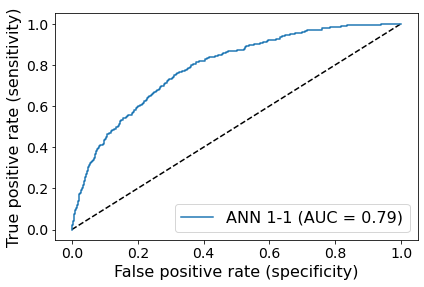

In [22]:
# =============================================================================
# ROC and AUC
# =============================================================================
fpr_keras, tpr_keras, thresholds_keras = roc_curve(Y_train[validate_set], y_pred)
auc_keras = auc(fpr_keras, tpr_keras)

fig = plt.figure()
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='ANN 1-1 (AUC = {:.2f})'.format(auc_keras))
#plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate (specificity)', fontsize=16)
plt.ylabel('True positive rate (sensitivity)', fontsize=16)
plt.legend(loc='best', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.savefig(os.path.join(classification_path, 'roc_curve_validation_ANN11.png'), dpi=300, transparent=True)

## Test set evaluation

In [24]:
# =============================================================================
# CONFUSSION MATRIX FOR THE BEST CLASSIFIER OVER TEST SET
# =============================================================================
# Load the best classifier
#best_model = keras.models.load_model('ann_classifier_best_new.h5')

X_test = file_management.load_lzma('X_test.lzma')
Y_test = file_management.load_lzma('Y_test.lzma')

# We evaluate the best classifier on its fold
y_test_pred = best_model.predict(X_test)

Y_test_pred = np.round(y_test_pred)
cm=confusion_matrix(Y_test,Y_test_pred)
print(cm)

22/22 [==============================] - 0s 2ms/step
[[416 117]
 [ 62 101]]


In [25]:
# =============================================================================
# OBTAIN ACCURACY, RECALL, PRECISION, F1SCORE FOR BEST MODEL
# =============================================================================
# Evalute its metrics
accuracy = accuracy_score(Y_test, Y_test_pred)
recall = recall_score(Y_test, Y_test_pred)
precision = precision_score(Y_test, Y_test_pred)
f1score = f1_score(Y_test, Y_test_pred)
print("Accuracy: %.2f%%" % (accuracy*100))
print("Recall: %.2f%%" % (recall*100))
print("Precision: %.2f%%" % (precision*100))
print("F1-score: %.2f%%" % (f1score*100))
print("Proportion of positives: %.2f%%" %(100*sum(Y_test)/len(Y_test)))

Accuracy: 74.28%
Recall: 61.96%
Precision: 46.33%
F1-score: 53.02%
Proportion of positives: 23.42%


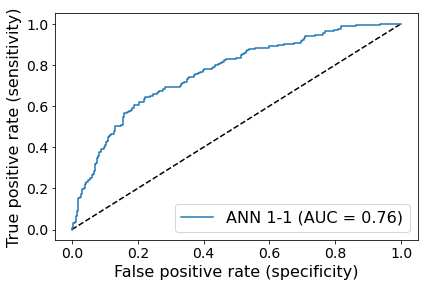

In [26]:
# =============================================================================
# ROC and AUC
# =============================================================================
fpr_keras, tpr_keras, thresholds_keras = roc_curve(Y_test, y_test_pred)
auc_keras = auc(fpr_keras, tpr_keras)

fig = plt.figure()
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='ANN 1-1 (AUC = {:.2f})'.format(auc_keras))
#plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate (specificity)', fontsize=16)
plt.ylabel('True positive rate (sensitivity)', fontsize=16)
plt.legend(loc='best', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.savefig(os.path.join(classification_path, 'roc_curve_test_ANN11.png'), dpi=300, transparent=True)

## SVM